In [ ]:
# !pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

import re

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing

import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_path= '/content/train.txt'

#df_path= '/content/predicted_unsupervised_sentiment.xlsx'


In [ ]:
df = pd.read_csv(df_path, sep='|', names=['label','comment'],on_bad_lines='skip')

#df = pd.read_excel(df_path)

In [ ]:
df

,label,comment
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী ব..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছ...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগে...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6309,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6310,surprise,এই কি স্বাধীন দেশ
6311,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6312,angry,চুদলাম দাদা পয়সা নাই


In [ ]:
#df['comment'] = df.sentence
#df['label'] = df.sentiment

In [ ]:
df

,label,comment
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী ব..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছ...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগে...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6309,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6310,surprise,এই কি স্বাধীন দেশ
6311,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6312,angry,চুদলাম দাদা পয়সা নাই


In [ ]:
df['label'].value_counts()

happy       1908
angry       1416
sad         1341
disgust      703
surprise     562
fear         384
Name: label, dtype: int64

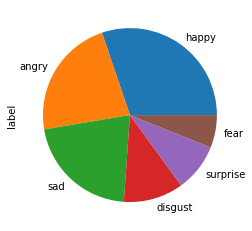

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='pie')

In [ ]:
df["label"] = df["label"].replace("sad",1)
df["label"] = df["label"].replace("happy",0)
df["label"] = df["label"].replace("angry",2)
df["label"] = df["label"].replace("disgust",3)
df["label"] = df["label"].replace("surprise",4)
df["label"] = df["label"].replace("fear",5)

df["label"].value_counts()

0    1908
2    1416
1    1341
3     703
4     562
5     384
Name: label, dtype: int64

In [ ]:
df

,label,comment
0,1,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী ব..."
1,1,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছ...
2,2,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগে...
3,0,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্...
4,2,রাতের বেলা আবার কিসের সকাল।
...,...,...
6309,4,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6310,4,এই কি স্বাধীন দেশ
6311,1,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6312,2,চুদলাম দাদা পয়সা নাই


In [ ]:
df.shape

(6314, 2)

In [ ]:
df.isnull().sum()

label      0
comment    0
dtype: int64

In [ ]:
if(df.duplicated().sum()>0):
  print("Found duplicate,Removing duplicate")
  df = df.drop_duplicates(keep = 'first')

Found duplicate,Removing duplicate


In [ ]:
df.shape

(6112, 2)

In [ ]:
# Data cleaning function
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [ ]:
# Apply the function into the dataframe
df['cleaned'] = df['comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [1,100,252,554,876,1000,1289,1550,2120,2500,4000,4500,5000,5500,6000]
for i in sample_data:
     print('Original:\n',df.comment[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Sentiment:-- ',df.label[i],'\n')

Original:
  তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু হয়েছে বলে কী আপনার মন পরে ? রাজনৈতিক শক্তির সামনে তদন্ত কিছুই করতে পারবে না ! আর তাই আমাদের সামান্য মাথাব্যাথা, পেট ব্যাথা হলে বা কলে পরিস্কার পানি না পেলে, সঠিক বিচার না পেলে আমরা আমাদের মাননীয় প্রধামন্ত্রীর দৃস্টি আর্কষন করে থাকি ! কিন্তু সকল দায়িত্ব কী তার একা ? তিনিই বা কেন লাথি দিয়ে এদের বহিস্কার করতে পারে না ? 
Cleaned:
  তদন্ত করে লাভ কী   কোন দিন কোন তদন্তের পর কিছু হয়েছে বলে কী আপনার মন পরে   রাজনৈতিক শক্তির সামনে তদন্ত কিছুই করতে পারবে না   আর তাই আমাদের সামান্য মাথাব্যাথা  পেট ব্যাথা হলে বা কলে পরিস্কার পানি না পেলে  সঠিক বিচার না পেলে আমরা আমাদের মাননীয় প্রধামন্ত্রীর দৃস্টি আর্কষন করে থাকি   কিন্তু সকল দায়িত্ব কী তার একা   তিনিই বা কেন লাথি দিয়ে এদের বহিস্কার করতে পারে না   
 Sentiment:--  1 

Original:
  কোথা হতে এল পহেলা বৈশাখ? 
Cleaned:
  কোথা হতে এল পহেলা বৈশাখ  
 Sentiment:--  4 

Original:
  ঘাতকদের দৃষ্টান্ত মূলক শাষ্টি চাই.... (১) ফাঁসি (২) লিঙ্গ পরির্বতন করে হিজড়া বানিয়ে পতিতালয়ে ভর্তি করা হোক 
Cleaned:
  ঘ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('bengali')
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  0
Number of Documents:1802
Number of Words:15436
Number of Unique Words:5502
Most Frequent Words:

ধন্যবাদ	348
ভাই	246
আপনাদের	193
ভাল	165
পুলিশ	161
সাথে	124
ভালো	102
কথা	101
আপনাকে	99
ইমরান	97

Class Name :  2
Number of Documents:1372
Number of Words:12702
Number of Unique Words:5725
Most Frequent Words:

ইমরান	107
তুই	88
ভাই	85
তোর	75
কথা	75
বিচার	72
একটা	70
মানুষ	65
চাই	62
হয়ে	53

Class Name :  1
Number of Documents:1304
Number of Words:16941
Number of Unique Words:6669
Most Frequent Words:

ভাই	132
বিচার	114
কথা	112
ইসলাম	100
দেশে	86
মানুষ	86
হয়ে	75
সরকার	65
মা	64
একটা	62

Class Name :  3
Number of Documents:695
Number of Words:7343
Number of Unique Words:3802
Most Frequent Words:

ভাই	55
মানুষ	51
কথা	46
ইমরান	44
সরকার	35
যায়	33
একটা	33
সাথে	29
মা	29
বড়	28

Class Name :  4
Number of Documents:557
Number of Words:6596
Number of Unique Words:3491
Most Frequent Words:

ভাই	54
কথা	49
মানুষ	33
বিচার	33
একটা	32
তনু	31
টাকা	30
সাথে	27
দিয়ে	25
ইমরান	24

Class Name :  5
Numbe

In [ ]:
# !pip list

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['cleaned']
y = df[df.columns[0]]

# preeee

In [ ]:
vocab_size = 20000
embedding_dim = 32
max_length = 2000
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
vectorizer = TextVectorization(max_tokens=vocab_size,
                               output_sequence_length=max_length,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(3000)
dataset = dataset.batch(4)
dataset = dataset.prefetch(2) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


# new pre

In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

1432    ভারতের লাখ লাখ লোক বেলা ভাত খেতে নাটাকার অভাবে...
6587        শেখ সেলিমের বাংলাদেশ লুটপাটের টাকা ইতাতো একটা
928                                               বড় পাগল
4586    বাংলাদেশের ইতিহাসে মার্চের মাহাত্ম্য অনুধাবন ন...
148     পাগল গুলারে মন্ত্রী বানাইসে দেশ টা বাপেরযা খুস...
                              ...                        
4852    রাজারা রাজার হালেই গরীবেরা আরো গরীব এটাকে জানে...
1196                 রাতের অন্ধকারের দিনের সুন্দর আলো আসে
4805    সরকারকে অভিনন্দন দেশ অস্তিত্বর সিদ্ধান্ত বদল ছ...
17                                 শুভেচ্ছা শুভকামনা রইলো
1224              তৈমর সাহসী বীর সাহসী বীর প্রয়োজন সমাজের
Name: cleaned, Length: 4989, dtype: object 2233                                       চোখে পানি গেলো
4554                বুকের ভেতর হলুদ একটা পাতার দীর্ঘশ্বাস
6183           অাইসিসির বিরুদ্ধে আন্তর্জাতিক আদালতে মামলা
1184                      সরকার টাকা কিবাবে লুট একটা কউসল
1102                        চোরের সাক্ষী মাতব্বরবুঝার কথা
                             

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4989,)
(4989,)


In [ ]:

vocab_size = 200000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(test_sequences,maxlen=max_length)

17219
Word index length:17219


In [ ]:
print("Padded shape(training): "+str(x_train.shape))
print("Padded shape(testing): "+str(x_test.shape))

Padded shape(training): (4989, 100)
Padded shape(testing): (666, 100)


# model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

#final layer
model1.add(Dense(1))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 32)          640000    
                                                                 
 flatten (Flatten)           (None, 64000)             0         
                                                                 
 dense (Dense)               (None, 512)               32768512  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0

In [ ]:
history1=model1.fit(train,epochs=1,validation_data= val)

 250/1069 [======>.......................] - ETA: 7:31 - loss: 0.0000e+00 - accuracy: 0.2170

KeyboardInterrupt: ignored

model

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(vocab_size+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy',metrics=['accuracy'], optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640032    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                      

In [ ]:
history=model.fit(train,epochs=10,validation_data= val)

Epoch 1/10
1069/1069 [==============================] - 1633s 2s/step - loss: -23085028.0000 - accuracy: 0.2140 - val_loss: -99351472.0000 - val_accuracy: 0.2221
Epoch 2/10
1069/1069 [==============================] - 1638s 2s/step - loss: -599912832.0000 - accuracy: 0.2154 - val_loss: -1376924416.0000 - val_accuracy: 0.2131
Epoch 3/10
1069/1069 [==============================] - 1654s 2s/step - loss: -3740534016.0000 - accuracy: 0.2119 - val_loss: -6252649472.0000 - val_accuracy: 0.2098
Epoch 4/10
1069/1069 [==============================] - 1664s 2s/step - loss: -12354582528.0000 - accuracy: 0.2116 - val_loss: -17183864832.0000 - val_accuracy: 0.2139
Epoch 5/10
1069/1069 [==============================] - 1646s 2s/step - loss: -31137599488.0000 - accuracy: 0.2095 - val_loss: -40817958912.0000 - val_accuracy: 0.2090
Epoch 6/10
1069/1069 [==============================] - 1648s 2s/step - loss: -63034142720.0000 - accuracy: 0.2182 - val_loss: -73834979328.0000 - val_accuracy: 0.2320
Epo

<Figure size 576x360 with 0 Axes>

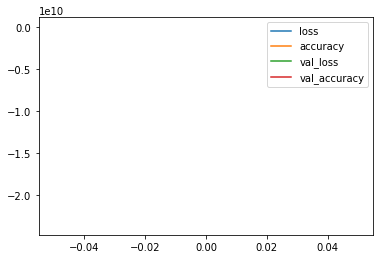

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(1, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          60000000  
                                                                 
 conv1d (Conv1D)             (None, 98, 200)           180200    
                                                                 
 bidirectional_1 (Bidirectio  (None, 98, 128)          135680    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 98, 128)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 50)               

In [ ]:
history=model1.fit(train,batch_size=64,epochs=1,validation_data= val)

291/291 [==============================] - 262s 898ms/step - loss: 0.0000e+00 - accuracy: 2.1478e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


# Eval

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 1.0, Recall:1.0, Accuracy:0.04878048598766327
